# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

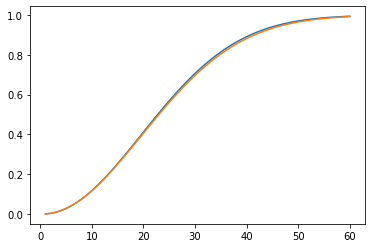

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

d = 365
@np.vectorize
def p(n): return 1 - math.prod(d - i for i in range(n)) / (d ** n)
@np.vectorize
def pa(n): return 1 - math.exp(-n * (n - 1) / (2 * d))

xs = np.arange(1, 60 + 1)

plt.plot(xs, p(xs))
plt.plot(xs, pa(xs))

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

In [15]:
import random
d = 365

def foo():
    occured = set()
    i = 0
    while True:
        num = random.randint(1, d)
        i += 1
        if num in occured:
            return i
        occured.add(num)

N = 100000

results = np.array([foo() for _ in range(N)])

most frequent = 21 occured: 3378
mean = 24.63811


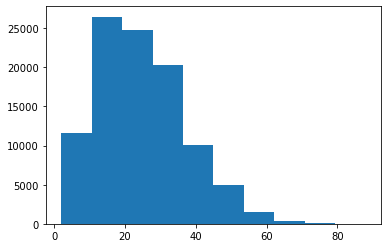

In [18]:
plt.hist(results)

# a) 23
from collections import Counter
val, cnt = Counter(results).most_common()[0]
print('most frequent =', val, 'occured:', cnt)

# b) 24.6
mean = np.mean(results)
print('mean =', mean)

# c) 23 is expected value of n of throws

**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

number of births on February 30th: 98


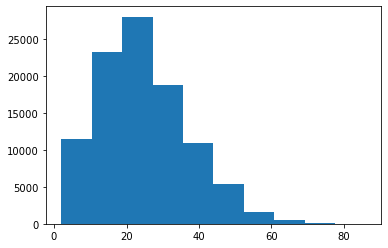

In [40]:
import numpy as np
import pandas as pd
from random import choices
import matplotlib.pyplot as plt

d = 365
N = 100000

df = pd.read_csv('us_births_69_88.csv')
res = df['births']
res.reset_index()

def foo():
    occured = set()
    i = 0
    while True:
        num = choices(res.index, weights=res)[0]
        i += 1
        if num in occured:
            return i
        occured.add(num)
    
results = np.array([foo() for _ in range(N)])
plt.hist(results)


# df[df['month'] == 2]['births'].plot(x='day')

t = df[(df['month'] == 2) & (df['day'] == 30)]['births'].iloc[0]
print('number of births on February 30th:', t)

# strange: invalid dates of birth cause ununiform distribution of births per day



# res[0]